# Rocket Manufacturing Cost Minimization problem

This problem aims to determine the optimal distribution of 25 components of a rocket produced on 4 different manufacturing processes, considering budget limits, production capacity of each process, demand requirements of components and subsidies. In this problem we assume 4 parallel processes where the same 25 components are being manufactured on each. The components are considered as a continuous variable, so for example, a component can be half manufactured on one process and half on another. 

## 1. Continuous linear model

The problem can be formulated mathematically as a linear programming problem using the following model.  

### Sets

 $C$ = set of components  
 $P$ = set of processes

### Parameters

 $c_i$ = cost per component $i$, $\forall i \in C$  
 $Bmax_j$ = maximum budget for process $j$, $\forall j \in P$  
 $Pmax_j$ = maximum production capacity $j$, $\forall j \in P$  
 $d_i$ = demand of component $i$, $\forall i \in C$  
 $s_j$= subsidy per component for process $j$, $\forall j \in P$  

 
### Variables
 $x_{ij}$ = quantity of component i produced on process j

### Objective

Minimize the total cost of the manufacturing process:  
 $\min \sum_{i \in C} \sum_{j \in P} (c_i - s_j) x_{ij}$

### Constraints


Process budget constraint:  
$\sum_{i \in C} c_i x_{ij} \leq Bmax_j $ $\forall j \in P$

Production capacity constraint:  
$\sum_{i \in C} x_{ij} \leq Pmax_j$ $\forall j \in P$

Demand fullfilment constraint:  
$\sum_{j \in P} x_{ij} \geq d_i$ $\forall i \in C$

Non-negativity constraint:  
$x_{ij} \geq 0$, $\forall i \in C$ $\forall j \in P$  


## Implementing the problem in pyomo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyomo.environ as pyo
from numpy.random import seed
from numpy.random import randint


C = np.arange(1, 26)
P = [1, 2, 3, 4]

c = np.array([8, 12, 10, 7, 8, 9, 10, 11, 9, 8, 10, 7, 11, 9, 12, 8, 10, 7, 9, 11, 8, 10, 9, 12, 7])
d = np.array([40, 25, 20, 15, 16, 18, 20, 21, 19, 18, 20, 14, 22, 18, 24, 17, 21, 15, 19, 22, 17, 20, 18, 24, 14])

Bmax = np.array([5000, 1000, 2000, 950])
Pmax = np.array([800, 400, 700, 300])
s = np.array([0.55, 0.6, 0.5, 0.7])


In [2]:
opt = pyo.SolverFactory('glpk')

model = pyo.ConcreteModel(name="Rocket components minimization costs")
# Components
model.C = pyo.Set(initialize=C) 
# Processes
model.P = pyo.Set(initialize=P) 

# Quantity of each component produced in each process
model.x = pyo.Var(model.C, model.P, domain=pyo.NonNegativeReals)

# Minimize the total cost of production
def cost_rule(model):
    return sum(sum((c[i-1] - s[j-1]) * model.x[i, j] for i in model.C) for j in model.P)
model.cost = pyo.Objective(rule=cost_rule)

# Process Budget Constraints
def budget_rule(model, j):
    return sum(c[i-1] * model.x[i, j] for i in model.C) <= Bmax[j-1]
model.budget_constraint = pyo.Constraint(model.P, rule=budget_rule)

# Production Capacity Constraints
def capacity_rule(model, j):
    return sum(model.x[i, j] for i in model.C) <= Pmax[j-1]
model.capacity_constraint = pyo.Constraint(model.P, rule=capacity_rule)

# Demand Fulfillment Constraints
def demand_rule(model, i):
    return sum(model.x[i, j] for j in model.P) >= d[i-1]
model.demand_constraint = pyo.Constraint(model.C, rule=demand_rule)


model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)


In [3]:
results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\victoria\AppData\Local\Temp\tmp11he4w95.glpk.raw --wglp
 C:\Users\victoria\AppData\Local\Temp\tmpe7su76bv.glpk.glp --cpxlp C:\Users\victoria\AppData\Local\Temp\tmpdvoh3g7s.pyomo.lp
Reading problem data from 'C:\Users\victoria\AppData\Local\Temp\tmpdvoh3g7s.pyomo.lp'...
33 rows, 100 columns, 300 non-zeros
608 lines were read
Writing problem data to 'C:\Users\victoria\AppData\Local\Temp\tmpe7su76bv.glpk.glp'...
569 lines were written
GLPK Simplex Optimizer 5.0
33 rows, 100 columns, 300 non-zeros
Preprocessing...
33 rows, 100 columns, 300 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.200e+01  ratio =  1.200e+01
GM: min|aij| =  8.739e-01  max|aij| =  1.144e+00  ratio =  1.309e+00
EQ: min|aij| =  7.638e-01  max|aij| =  1.000e+00  ratio =  1.309e+00
Constructing initial basis...
Size of triangular part is 33
      0: obj =   0.000000000e+00 inf =   5.030e+02 (25)
     25: obj =   4.42

In [4]:
model.display()

Model Rocket components minimization costs

  Variables:
    x : Size=100, Index=x_index
        Key     : Lower : Value            : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (1, 2) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (1, 3) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (1, 4) :     0 :             40.0 :  None : False : False : NonNegativeReals
         (2, 1) :     0 :             25.0 :  None : False : False : NonNegativeReals
         (2, 2) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (2, 3) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (2, 4) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (3, 1) :     0 :             20.0 :  None : False : False : NonNegativeReals
         (3, 2) :     0 :              0.0 :  None : False : 

## Sensitivity analysis
* _Budget Constraints_: A one-unit increase in the budget of process 2 and process 4 would result in a decrease of approximately 0.005 and 0.018 units, respectively, in the total cost.

* _Capacity Constraints_: The dual values for all production capacity constraints are 0.0, which means that there is no impact on the total cost if you slightly increase or decrease the production 
capacity of any process.

* _Demand Constraints_: The dual values provide information about the impact on the objective function if the demand for each item is increased by one unit. For example, demand_constraint[10] has a dual value of approximately 7.44. This means that if the demand for component 10 increases by one unit, the total cost will increase by approximately 7.44 units.


In [5]:
model.pprint()

3 Set Declarations
    C : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   25 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
    P : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    C*P :  100 : {(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4), (7, 1), (7, 2), (7, 3), (7, 4), (8, 1), (8, 2), (8, 3), (8, 4), (9, 1), (9, 2), (9, 3), (9, 4), (10, 1), (10, 2), (10, 3), (10, 4), (11, 1), (11, 2), (11, 3), (11, 4), (12, 1), (12, 2), (12, 3), (12, 4), (13, 1), (13, 2), (13, 3), (13, 4), (14, 1), (14, 2), (14, 3), (14, 4), (15, 1), (

## 2. Mixed Integer Optimization model

Let's now change the problem to have a mixed integer problem. As previously, we aim to determine the optimal distribution of 25 components of a rocket produced on 4 different manufacturing processes, considering budget limits per process, production capacity of each process, demand requirements of components and subsidies. 
However, in this case the company is eligible for the subsidy if it has a minimum number of components manufactured on each process. Aditionally, the objetive function now is defined with a fixed added value due to supply costs (energy, rent, insurance etc) and having in mind that components are integer variables, each component must be entirelly manufactured on 1 process.

### Sets

 $C$ = set of components  
 $P$ = set of processes

### Parameters

 $c_i$ = cost per component $i$, $\forall i \in C$    
 $d_i$ = demand of component $i$, $\forall i \in C$  
 $s_j$= subsidy per component for process $j$, $\forall j \in P$  
 $e_j$ = number of employees per process j, $\forall j \in P$  
 $Xmin_j$ = minimum number of components per process j to be eligible for subsidy, $\forall j \in P$  
 $Bmax_j$ = maximum budget for process $j$, $\forall j \in P$  
 $Pmax_j$ = maximum production capacity $j$, $\forall j \in P$  
 $F$ = fixed costs  
 $M$ = big number for defining the binary constraint
 
 
### Variables
 $x_{ij}$ = quantity of component i produced on process j  
 $y^1_j$   = binary variable for eligibility of subsidy for process j, $\forall j \in P$  
 $z_{ij}$ = non-linear variable defining the term $x_{ij}y^1_j$  
 $y^2$ = binary variable for defining the presence of fixed costs  


### Objective

Minimize the total cost of the manufacturing process:  
 $\min \sum_{i \in C} \sum_{j \in P} c_i x_{ij}  - s_j z_{ij} + Fy^2 $

### Constraints


Process budget constraint:  
$\sum_{i \in C} c_i x_{ij} \leq Bmax_j $ $\forall j \in P$

Production capacity constraint:  
$\sum_{i \in C} x_{ij} \leq Pmax_j$ $\forall j \in P$

Demand fullfilment constraint:  
$\sum_{j \in P} x_{ij} \geq d_i$ $\forall i \in C$

Non-negativity constraint:  
$x_{ij} \geq 0$, $\forall i \in C$ $\forall j \in P$  

Fixed costs constraint:  
$\sum_{i \in C}\sum_{j \in P} x_{ij} \leq My^2$    $\forall i \in C$ $\forall j \in P$  

Non-linearity constraints:  
$z_{ij}\leq  y^1_j M$ $\forall i \in C$ $\forall j \in P$  
$z_{ij}\leq x_{ij}$ $\forall i \in C$ $\forall j \in P$  
$z_{ij}\geq x_{ij} - (1- y^1_j) M$ $\forall i \in C$ $\forall j \in P$

Subsidy constraint:  
$-M (1-y^1_j) + Xmin_j \leq \sum_{i \in C}x_{ij} \leq Xmin_j + M y^1_j$ $\forall j \in P$

Binary variables:  
$y^1_j \in \{0,1\}$  $\forall j \in P$  
$y^2 \in \{0,1\}$ 


In [6]:
C = np.arange(1, 26)
P = [1, 2, 3, 4]

c = np.array([8, 12, 10, 7, 8, 9, 10, 11, 9, 8, 10, 7, 11, 9, 12, 8, 10, 7, 9, 11, 8, 10, 9, 12, 7])
d = np.array([40, 25, 20, 15, 16, 18, 20, 21, 19, 18, 20, 14, 22, 18, 24, 17, 21, 15, 19, 22, 17, 20, 18, 24, 14])

Bmax = np.array([5000, 1000, 2000, 950])
Pmax = np.array([800, 400, 700, 300])
s = np.array([0.55, 0.6, 0.5, 0.7])


M = 1000
F = 400

Xmin = np.array([400, 100, 200, 250])


In [7]:
opt = pyo.SolverFactory('glpk')

model = pyo.ConcreteModel(name="Rocket components MIO minimization costs")
# Components
model.C = pyo.Set(initialize=C)
# Processes
model.P = pyo.Set(initialize=P)

# Quantity of each component produced in each process
model.x = pyo.Var(model.C, model.P, domain=pyo.NonNegativeIntegers)

# Binary variables
model.y1 = pyo.Var(model.P, domain=pyo.Binary)
model.y2 = pyo.Var(domain=pyo.Binary)

# Non linear variables
model.z= pyo.Var(model.C,model.P,domain=pyo.NonNegativeReals)

# Minimize the total cost of production
def cost_rule(model):
    return sum(sum(c[i-1] * model.x[i, j] - s[j-1]* model.z[i,j]  for i in model.C) for j in model.P) + F * model.y2

model.cost = pyo.Objective(rule=cost_rule)

# Process Budget Constraints
def budget_rule(model, j):
    return sum(c[i - 1] * model.x[i, j] for i in model.C) <= Bmax[j - 1]

model.budget_constraint = pyo.Constraint(model.P, rule=budget_rule)

# Production Capacity Constraints
def capacity_rule(model, j):
    return sum(model.x[i, j] for i in model.C) <= Pmax[j - 1]

model.capacity_constraint = pyo.Constraint(model.P, rule=capacity_rule)

# Demand Fulfillment Constraints
def demand_rule(model, i):
    return sum(model.x[i, j] for j in model.P) >= d[i - 1]

model.demand_constraint = pyo.Constraint(model.C, rule=demand_rule)


# Fixed costs constraint
def fixed_costs_rule(model):
    return sum(sum(model.x[i, j] for i in model.C) for j in model.P) <= M * model.y2

model.fixed_costs_constraint = pyo.Constraint(rule=fixed_costs_rule)

def linearization_constraints1_rule(model, i, j):
    return model.z[i, j] <= model.x[i, j]
model.linearization_constraints1 = pyo.Constraint(model.C, model.P, rule=linearization_constraints1_rule)

def linearization_constraints2_rule(model, i, j):
    return model.z[i, j] <= M * model.y1[j]
model.linearization_constraints2 = pyo.Constraint(model.C, model.P, rule=linearization_constraints2_rule)

def linearization_constraints3_rule(model, i, j):
    return model.z[i, j] >= model.x[i, j] - M * (1 - model.y1[j])
model.linearization_constraints3 = pyo.Constraint(model.C, model.P, rule=linearization_constraints3_rule)

#Subsidy binary constraint
def subsidy_rule1(model,j):
    return -M * (1-model.y1[j]) + Xmin[j-1] <= sum(model.x[i, j] for i in model.C)

model.subsidy_rule1 = pyo.Constraint(model.P, rule=subsidy_rule1)

def subsidy_rule2(model,j):
    return sum(model.x[i, j] for i in model.C) <= Xmin[j-1] + M * model.y1[j]

model.subsidy_rule2 = pyo.Constraint(model.P, rule=subsidy_rule2)

# Solve the model
results = opt.solve(model,tee=True)


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\victoria\AppData\Local\Temp\tmpoug45v4c.glpk.raw --wglp
 C:\Users\victoria\AppData\Local\Temp\tmp4jukq0uz.glpk.glp --cpxlp C:\Users\victoria\AppData\Local\Temp\tmp5toofkqz.pyomo.lp
Reading problem data from 'C:\Users\victoria\AppData\Local\Temp\tmp5toofkqz.pyomo.lp'...
C:\Users\victoria\AppData\Local\Temp\tmp5toofkqz.pyomo.lp:2852: warning: lower bound of variable 'x202' redefined
C:\Users\victoria\AppData\Local\Temp\tmp5toofkqz.pyomo.lp:2852: warning: upper bound of variable 'x202' redefined
342 rows, 205 columns, 1309 non-zeros
105 integer variables, 5 of which are binary
2857 lines were read
Writing problem data to 'C:\Users\victoria\AppData\Local\Temp\tmp4jukq0uz.glpk.glp'...
2602 lines were written
GLPK Integer Optimizer 5.0
342 rows, 205 columns, 1309 non-zeros
105 integer variables, 5 of which are binary
Preprocessing...
204 constraint coefficient(s) were reduced
342 rows, 205 columns, 1

In [8]:
model.display()

Model Rocket components MIO minimization costs

  Variables:
    x : Size=100, Index=x_index
        Key     : Lower : Value : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :  40.0 :  None : False : False : NonNegativeIntegers
         (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (1, 4) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (2, 1) :     0 :  25.0 :  None : False : False : NonNegativeIntegers
         (2, 2) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (2, 3) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (2, 4) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (3, 1) :     0 :  20.0 :  None : False : False : NonNegativeIntegers
         (3, 2) :     0 :   0.0 :  None : False : False : NonNegativeIntegers
         (3, 3) :     0 :   0.0 :  None : False : False : NonN

##### With the additional restrictions we can observe how the distribution changes. Before, as no constrains where applied to the subsidies, the best option for minimizing the cost function was to choose the processes were subsidy rate was higher (1,2 and 4). However, now that we have contrained this condition, choosing only process 1 its more convenient as the final sum of all components produced here will make the subsidy to be applied (as y1 shows), then, distributing the components manufacturing is not cost effective.

## 3. Relaxed problem
Let's now evaluate the relaxed version of previous problem. The variable x is now defined as continuous, as well as the binary variables, in this case with a bound between 0 and 1.


In [9]:
opt = pyo.SolverFactory('glpk')

model = pyo.ConcreteModel(name="Rocket components MIO relaxed problem")
# Components
model.C = pyo.Set(initialize=C)
# Processes
model.P = pyo.Set(initialize=P)

# Quantity of each component produced in each process
model.x = pyo.Var(model.C, model.P, domain=pyo.NonNegativeReals)

# Binary variables
model.y1 = pyo.Var(model.P, domain=pyo.NonNegativeReals,bounds=(0,1))
model.y2 = pyo.Var(domain=pyo.NonNegativeReals, bounds=(0,1))

# Non linear variables
model.z= pyo.Var(model.C,model.P,domain=pyo.NonNegativeReals)

# Minimize the total cost of production
def cost_rule(model):
    return sum(sum(c[i-1] * model.x[i, j] - s[j-1]* model.z[i,j]  for i in model.C) for j in model.P) + F * model.y2

model.cost = pyo.Objective(rule=cost_rule)

# Process Budget Constraints
def budget_rule(model, j):
    return sum(c[i - 1] * model.x[i, j] for i in model.C) <= Bmax[j - 1]

model.budget_constraint = pyo.Constraint(model.P, rule=budget_rule)

# Production Capacity Constraints
def capacity_rule(model, j):
    return sum(model.x[i, j] for i in model.C) <= Pmax[j - 1]

model.capacity_constraint = pyo.Constraint(model.P, rule=capacity_rule)

# Demand Fulfillment Constraints
def demand_rule(model, i):
    return sum(model.x[i, j] for j in model.P) >= d[i - 1]

model.demand_constraint = pyo.Constraint(model.C, rule=demand_rule)


# Fixed costs constraint
def fixed_costs_rule(model):
    return sum(sum(model.x[i, j] for i in model.C) for j in model.P) <= M * model.y2

model.fixed_costs_constraint = pyo.Constraint(rule=fixed_costs_rule)

def linearization_constraints1_rule(model, i, j):
    return model.z[i, j] <= model.x[i, j]
model.linearization_constraints1 = pyo.Constraint(model.C, model.P, rule=linearization_constraints1_rule)

def linearization_constraints2_rule(model, i, j):
    return model.z[i, j] <= M * model.y1[j]
model.linearization_constraints2 = pyo.Constraint(model.C, model.P, rule=linearization_constraints2_rule)

def linearization_constraints3_rule(model, i, j):
    return model.z[i, j] >= model.x[i, j] - M * (1 - model.y1[j])
model.linearization_constraints3 = pyo.Constraint(model.C, model.P, rule=linearization_constraints3_rule)

#Subsidy binary constraint
def subsidy_rule1(model,j):
    return -M * (1-model.y1[j]) + Xmin[j-1] <= sum(model.x[i, j] for i in model.C)

model.subsidy_rule1 = pyo.Constraint(model.P, rule=subsidy_rule1)

def subsidy_rule2(model,j):
    return sum(model.x[i, j] for i in model.C) <= Xmin[j-1] + M * model.y1[j]

model.subsidy_rule2 = pyo.Constraint(model.P, rule=subsidy_rule2)

# Solve the model
results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\victoria\AppData\Local\Temp\tmpi0be9i2q.glpk.raw --wglp
 C:\Users\victoria\AppData\Local\Temp\tmp_mf51skh.glpk.glp --cpxlp C:\Users\victoria\AppData\Local\Temp\tmpkwkomjcw.pyomo.lp
Reading problem data from 'C:\Users\victoria\AppData\Local\Temp\tmpkwkomjcw.pyomo.lp'...
342 rows, 205 columns, 1309 non-zeros
2750 lines were read
Writing problem data to 'C:\Users\victoria\AppData\Local\Temp\tmp_mf51skh.glpk.glp'...
2407 lines were written
GLPK Simplex Optimizer 5.0
342 rows, 205 columns, 1309 non-zeros
Preprocessing...
342 rows, 205 columns, 1309 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+03  ratio =  1.000e+03
GM: min|aij| =  8.615e-01  max|aij| =  1.161e+00  ratio =  1.348e+00
EQ: min|aij| =  7.560e-01  max|aij| =  1.000e+00  ratio =  1.323e+00
Constructing initial basis...
Size of triangular part is 342
      0: obj =   0.000000000e+00 inf =   1.165e+03 (25)
     27: obj

In [10]:
model.display()

Model Rocket components MIO relaxed problem

  Variables:
    x : Size=100, Index=x_index
        Key     : Lower : Value            : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (1, 2) :     0 : 5.00000000000016 :  None : False : False : NonNegativeReals
         (1, 3) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (1, 4) :     0 : 34.9999999999998 :  None : False : False : NonNegativeReals
         (2, 1) :     0 :             25.0 :  None : False : False : NonNegativeReals
         (2, 2) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (2, 3) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (2, 4) :     0 :              0.0 :  None : False : False : NonNegativeReals
         (3, 1) :     0 :             20.0 :  None : False : False : NonNegativeReals
         (3, 2) :     0 :              0.0 :  None : False :

##### On the previous MIO problem the cost function final value was 4825.65, while on the relaxed version is 4599.77, then, solutions do not match. This is explained because the feasible region defined on the integer problem is smaller (with less valid optimal solutions) than the one from the relaxed version. In the process of enforcing integer constraints, the optimization algorithm needs to explore a different set of solutions, potentially leading to a different (and most of the times on minimization problems, also higher) cost function value in order to meet the integer requirements.

## 4. Size of the problem vs time to solve

In order to evaluate how the solver execute different sizes problems, we will do a simulation of our problem increasing the number of processes exponentially: 4,8,16,32,64. It may not have much sense to evaluate that many number of processes from the optimization point of view, but this is for investigation purpose only. In order to do it, random data is generated with the bounds are considered the problem can handle.

In [11]:
def rocket_comp_opt(C,P,c,s,F,Bmax,Pmax,d,Xmin):
    M= 10000
    model = pyo.ConcreteModel(name="Rocket components MIO minimization costs")
    # Components
    model.C = pyo.Set(initialize=C)
    # Processes
    model.P = pyo.Set(initialize=P)

    # Quantity of each component produced in each process
    model.x = pyo.Var(model.C, model.P, domain=pyo.NonNegativeIntegers)

    # Binary variables
    model.y1 = pyo.Var(model.P, domain=pyo.Binary)
    model.y2 = pyo.Var(domain=pyo.Binary)

    # Non linear variables
    model.z= pyo.Var(model.C,model.P,domain=pyo.NonNegativeReals)

    # Minimize the total cost of production
    def cost_rule(model):
        return sum(sum(c[i-1] * model.x[i, j] - s[j-1]* model.z[i,j]  for i in model.C) for j in model.P) + F * model.y2

    model.cost = pyo.Objective(rule=cost_rule)

    # Process Budget Constraints
    def budget_rule(model, j):
        return sum(c[i - 1] * model.x[i, j] for i in model.C) <= Bmax[j - 1]

    model.budget_constraint = pyo.Constraint(model.P, rule=budget_rule)

    # Production Capacity Constraints
    def capacity_rule(model, j):
        return sum(model.x[i, j] for i in model.C) <= Pmax[j - 1]

    model.capacity_constraint = pyo.Constraint(model.P, rule=capacity_rule)

    # Demand Fulfillment Constraints
    def demand_rule(model, i):
        return sum(model.x[i, j] for j in model.P) >= d[i - 1]

    model.demand_constraint = pyo.Constraint(model.C, rule=demand_rule)


    # Fixed costs constraint
    def fixed_costs_rule(model):
        return sum(sum(model.x[i, j] for i in model.C) for j in model.P) <= M * model.y2

    model.fixed_costs_constraint = pyo.Constraint(rule=fixed_costs_rule)

    def linearization_constraints1_rule(model, i, j):
        return model.z[i, j] <= model.x[i, j]
    model.linearization_constraints1 = pyo.Constraint(model.C, model.P, rule=linearization_constraints1_rule)

    def linearization_constraints2_rule(model, i, j):
        return model.z[i, j] <= M * model.y1[j]
    model.linearization_constraints2 = pyo.Constraint(model.C, model.P, rule=linearization_constraints2_rule)

    def linearization_constraints3_rule(model, i, j):
        return model.z[i, j] >= model.x[i, j] - M * (1 - model.y1[j])
    model.linearization_constraints3 = pyo.Constraint(model.C, model.P, rule=linearization_constraints3_rule)

    #Subsidy binary constraint
    def subsidy_rule1(model,j):
        return -M * (1-model.y1[j]) + Xmin[j-1] <= sum(model.x[i, j] for i in model.C)

    model.subsidy_rule1 = pyo.Constraint(model.P, rule=subsidy_rule1)

    def subsidy_rule2(model,j):
        return sum(model.x[i, j] for i in model.C) <= Xmin[j-1] + M * model.y1[j]

    model.subsidy_rule2 = pyo.Constraint(model.P, rule=subsidy_rule2)

    # Solve the model
    results = opt.solve(model)

    
    return results


In [12]:
# seed random number generator
seed(1)

C = np.arange(1, 26)
#number of processes to test
P = [np.arange(1, 4),np.arange(1, 8),np.arange(1, 16),np.arange(1, 32), np.arange(1, 64)]

Times =[]
N_variables=[]

for j in P:
    ## Defining the random data depending on the size of P
    c= randint(5,15,C.size*j.size)
    s= np.random.uniform(low=0, high=1, size=(j.size,))
    d= randint(10,20, C.size*j.size)
    Bmax= randint(5000,10000, j.size)
    Pmax= randint(800,1000, j.size)
    Xmin= randint(100,300, j.size)
    
    ## Solving the problem for a size of P
    results= rocket_comp_opt(C,j,c,s,F,Bmax,Pmax,d,Xmin)

    #We can print the results to ensure the problems found a optimal solution
    #print(results)
    Times.append(results.Solver.Time)
    N_variables.append(C.size*j.size)
    print(f'Time to solve: {results.Solver.Time}', f'\n Problem size (number of variables):{C.size*j.size}')
    print()


Time to solve: 0.04523611068725586 
 Problem size (number of variables):75

Time to solve: 0.06681180000305176 
 Problem size (number of variables):175

Time to solve: 0.07863259315490723 
 Problem size (number of variables):375

Time to solve: 0.12949180603027344 
 Problem size (number of variables):775

Time to solve: 0.2817654609680176 
 Problem size (number of variables):1575



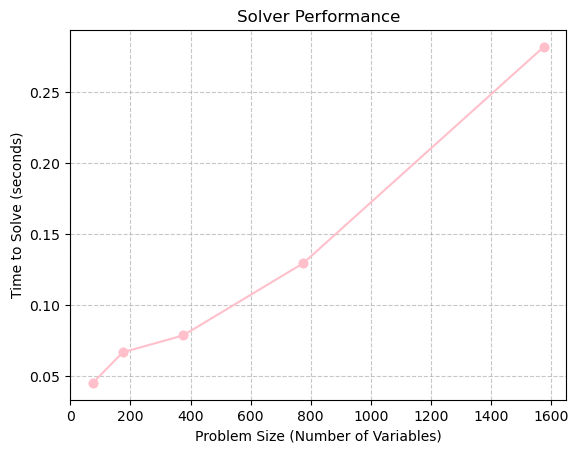

In [13]:
# Scatter plot
plt.plot(N_variables, Times, marker='o', color='pink', label='Solver Performance')
plt.scatter(N_variables, Times, color='pink', marker='o')

# Title and labels
plt.title('Solver Performance')
plt.xlabel('Problem Size (Number of Variables)')
plt.ylabel('Time to Solve (seconds)')

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


##### As can be observed, the size of the data has an impact in the time to solve the problem. Concretelly, we can see a linear trend. However, the slope may seem steep, but we must focus on the scale, as even with 1575 variables, the solver did take only around 0.28 s. Therefore, the data size has impact on time but the solvers can still handle much larger data sets.

## 5. Cost function vs subsidy

To observe how the optimal values of the objetive function vary in terms of one of the parameters we need to choose one that may affect directly to the function. Among them we have the costs and subsidies. We have chosen the second one as could give more interesting insigths. In order to be sure they affect most times, let's define its constrain with slower minimum values (Xmin).

The method to change the value of s is by increasing from a 0 array each element of the array by 0.5 until 7 (this bound was decided because trying higher values the problem did not find an optimum, as the lowest value of c is 8). Also we tried to increase one by one the elements on the array, but found that our problem gives the same optimal solution for $s=[0.5, 0, 0, 0]$ than, for example, for $s=[0.5, 0.5, 0.5, 0.5]$

In [14]:
C = np.arange(1, 26)
P = [1, 2, 3, 4]
c = np.array([8, 12, 10, 7, 8, 9, 10, 11, 9, 8, 10, 7, 11, 9, 12, 8, 10, 7, 9, 11, 8, 10, 9, 12, 7])
d = np.array([40, 25, 20, 15, 16, 18, 20, 21, 19, 18, 20, 14, 22, 18, 24, 17, 21, 15, 19, 22, 17, 20, 18, 24, 14])
Bmax = np.array([5000, 1000, 2000, 950])
Pmax = np.array([800, 400, 700, 300])
M = 1000
F = 400
Xmin = np.array([50, 40, 70, 80])

s = np.zeros(4)
lower_bounds= []
s_value= []
n_iter= 15
counter=0
while counter< n_iter:
    # Increment the i-th element of s by 0.1
    results= rocket_comp_opt(C,P,c,s,F,Bmax,Pmax,d,Xmin)   
    print(f's: {s}', f'\n Result:{results.Problem.Lower_bound}')
    lower_bounds.append(results.Problem.Lower_bound)
    s_value.append(s.mean())
    s += 0.5
    counter+=1
        


s: [0. 0. 0. 0.] 
 Result:5099.0
s: [0.5 0.5 0.5 0.5] 
 Result:4850.5
s: [1. 1. 1. 1.] 
 Result:4602.0
s: [1.5 1.5 1.5 1.5] 
 Result:4353.5
s: [2. 2. 2. 2.] 
 Result:4105.0
s: [2.5 2.5 2.5 2.5] 
 Result:3856.5
s: [3. 3. 3. 3.] 
 Result:3608.0
s: [3.5 3.5 3.5 3.5] 
 Result:3359.5
s: [4. 4. 4. 4.] 
 Result:3111.0
s: [4.5 4.5 4.5 4.5] 
 Result:2862.5
s: [5. 5. 5. 5.] 
 Result:2614.0
s: [5.5 5.5 5.5 5.5] 
 Result:2365.5
s: [6. 6. 6. 6.] 
 Result:2117.0
s: [6.5 6.5 6.5 6.5] 
 Result:1868.5
s: [7. 7. 7. 7.] 
 Result:1620.0


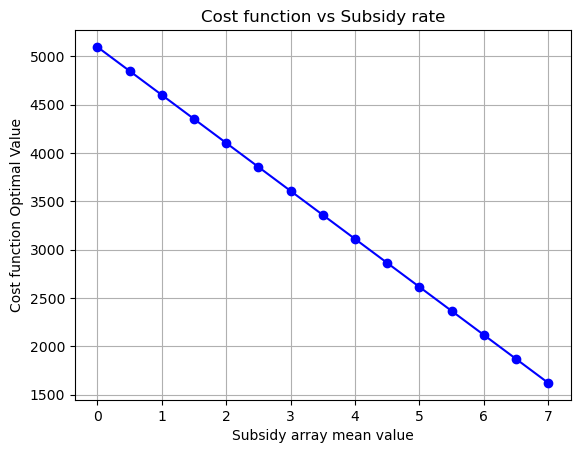

In [15]:
plt.plot(s_value,lower_bounds, marker='o', linestyle='-', color='b')
plt.title('Cost function vs Subsidy rate')
plt.xlabel('Subsidy array mean value')
plt.ylabel('Cost function Optimal Value')
plt.grid(True)
plt.show()

##### As can be observed, the subsidities has a clear negative impact on the final optimal value of the objective function, giving higher cost when they are 0, and the lowest when reaching their maximum, that in this case is 7.